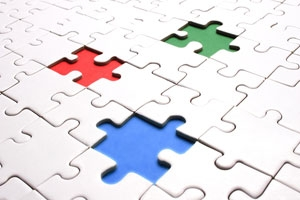

Existen varias alternativas cuando nos encontramos con datos incompletos o *missing data*. 

En primer lugar, podemos clasificarlos en tres categorías

## 1. Missing Completely at Random (MCAR)

La pérdida de datos no tiene que ver con la observación estudiada. Por ejemplo, un sensor que se quede sin batería, un cuestionario perdido en una oficina de correos, o una muestra sanguínea fallida en un laboratorio. 

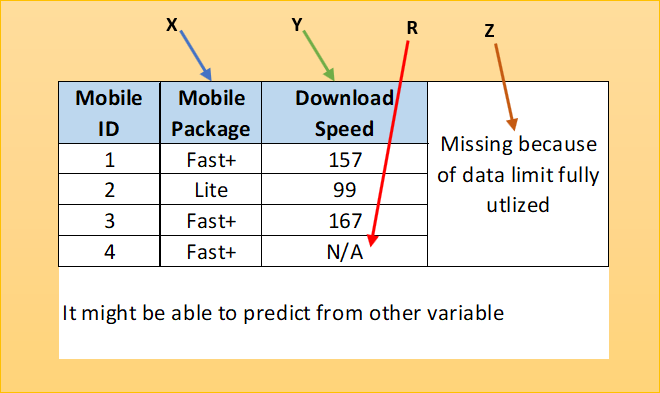

X: Variable completa  
Y: Variable con datos incompletos  
R: Valores incompletos  

Los valores incompletos no guardan relación con las variables X o Y sino que se deben a otra razón Z

## 2. Missing at Random (MAR)
El valor incompleto en una variable Y está relacionado con otra variable completa X

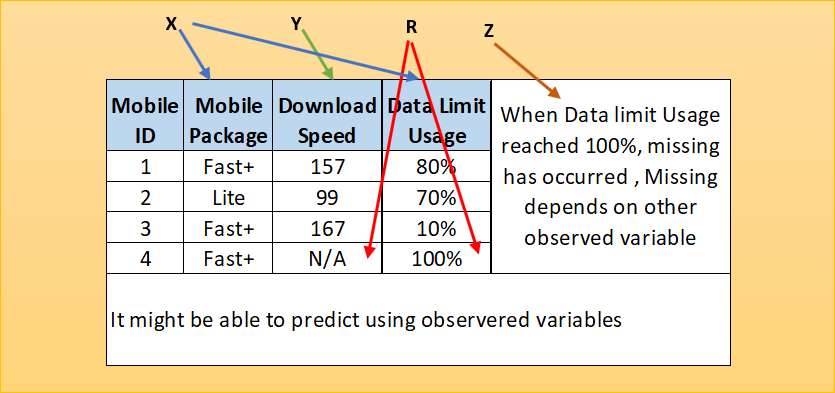

## 3. Missing not at Random (MNAR)
Datos incompletos que no se explican por ninguno de los motivos anteriores  
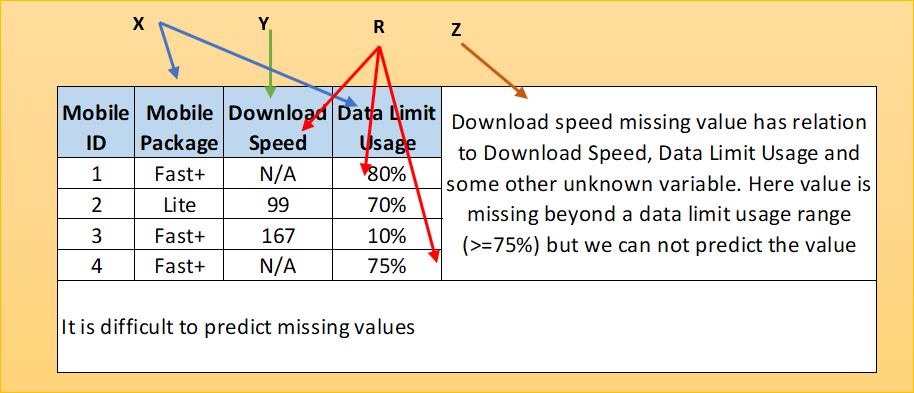

# Aproximaciones para tratar los missings

### Intenta obtenerlos
A veces es posible encontrar los valores incompletos (repitiendo una encuesta, buscando en otras fuentes, etc.). Esto no suele ser lo habitual

### Inferencia
Sin ser la mejor opción, podemos intentar inferir los missings. Por ejemplo, si no hay datos del número de baños de una casa y ésta tiene 60m2, podemos inferir que tiene un baño. O si una persona ha respondido a una encuesta dando a todo una nota de 10 menos a un campo, podemos inferir que ese campo también es igual a 10.

### Descartar datos (Complete Case Analysis, CCA)
Omitir los registros (filas) con algún dato faltante y analizar el dataset resultante. Si el tamaño del conjunto de datos es grande, y no hay demasiados missing values, puede ser una estrategia válida. Sin embargo, cuando no tenemos muchos datos o no se satisface MCAR, no es la mejor aproximación, y puede causar sesgo en los datos.
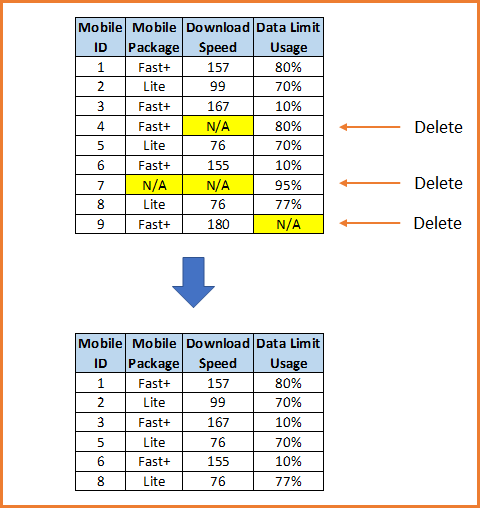

### Descartar los valores incompletos (Available Case Analysis, ACA)
Solo se ignoran los valores incompletos, manteniendo los registros con las variables sin missings. Si hay muchos missings, el análisis será deficiente 

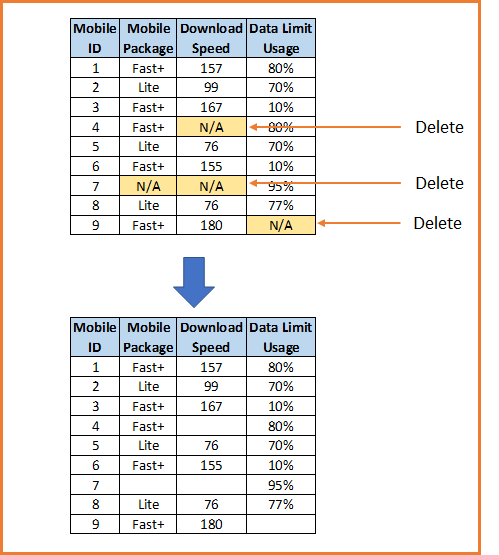

### Eliminar campos
Si una variable tiene muchos missings, una opción puede ser eliminar la columna del dataset. Por ejemplo, una variable con el 99% de nulos, no aportará mucha información y podremos eliminarla. En cualquier caso, es una decisión que hay que tomar con cuidado, y depende de cada caso.  

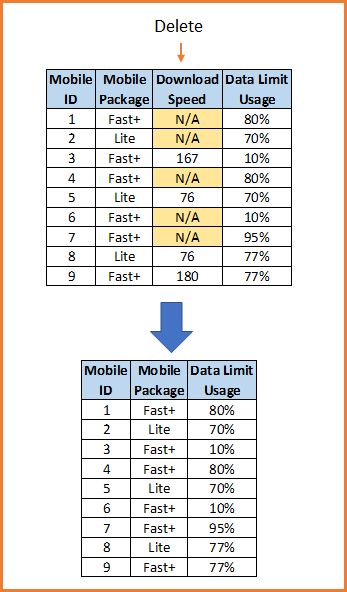

### Media, Mediana y Moda
En lugar de eliminar, reemplazamos valores missing con estimaciones estadísticas como la media, la moda o la mediana.  En una sustitución por la media, el valor medio de una variable se usa en lugar del valor de los datos que faltan para esa misma variable. Esto tiene la ventaja de no cambiar la media muestral de esa variable. Sin embargo, con valores faltantes que no son estrictamente aleatorios, especialmente en presencia de una gran desigualdad en el número de valores faltantes para las diferentes variables, el método de sustitución de medias puede conducir a un sesgo inconsistente.


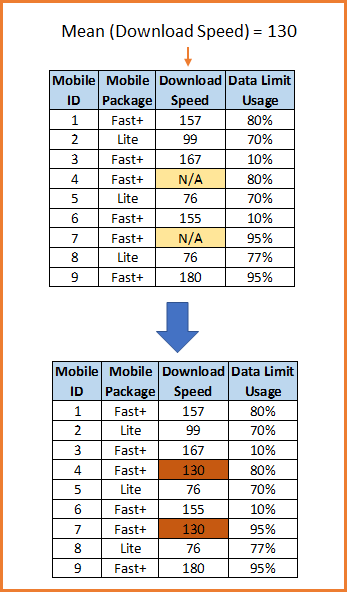 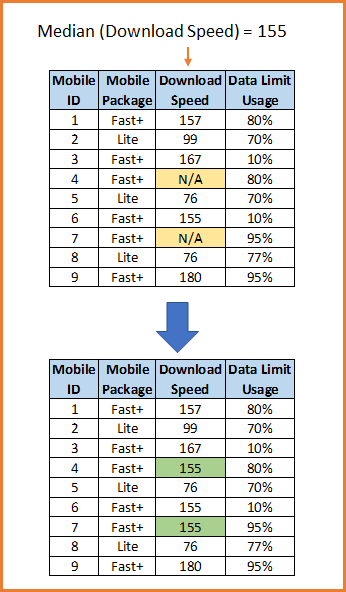 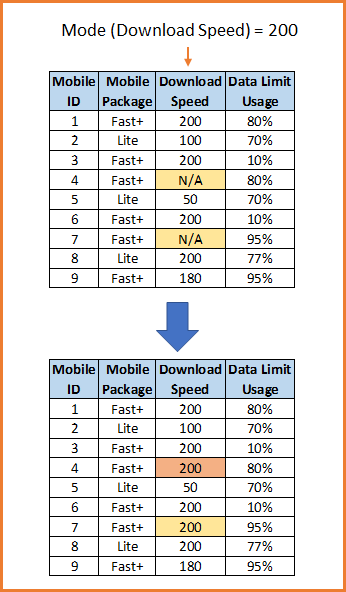

### Datos temporales
Si los datos son series temporales, podemos reemplazar un missing por el valor observado previo, o el posterior, o interpolando ambos

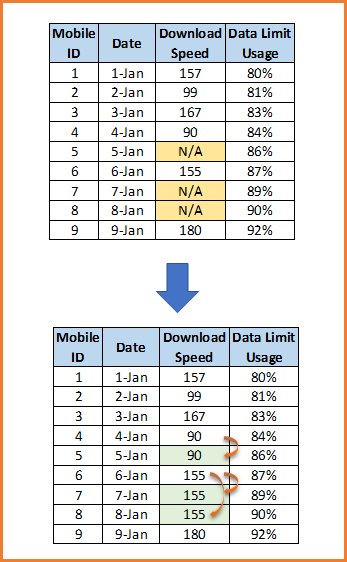

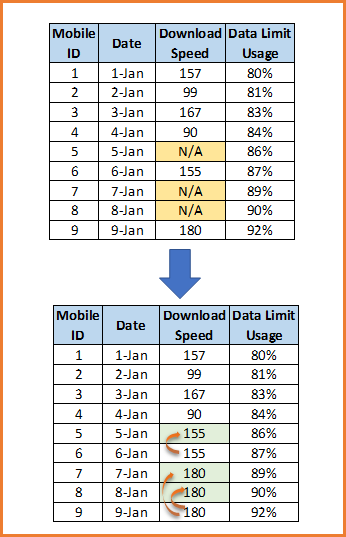

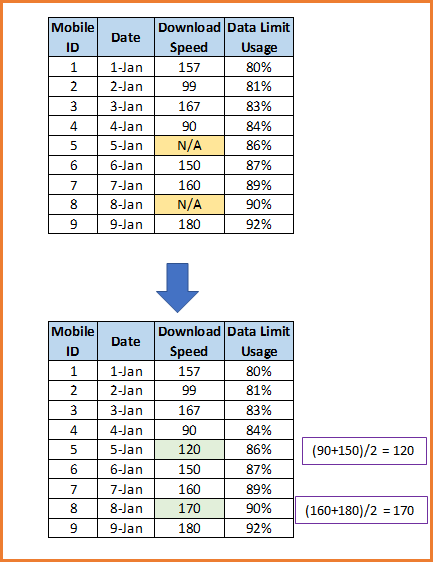

### Crear una categoría nueva indicando missings
Utilizado sobre todo en variables categóricas, consiste en incluir una etiqueta para datos faltantes
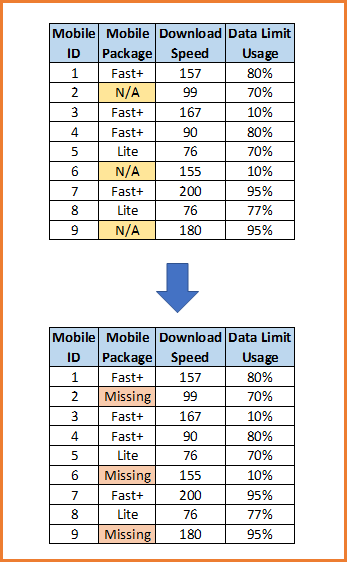

### Valor más frecuente
Con variables categóricas, podemos imputar los missings al valor más frecuente (equivalente a la media/mediana/moda para categóricas)
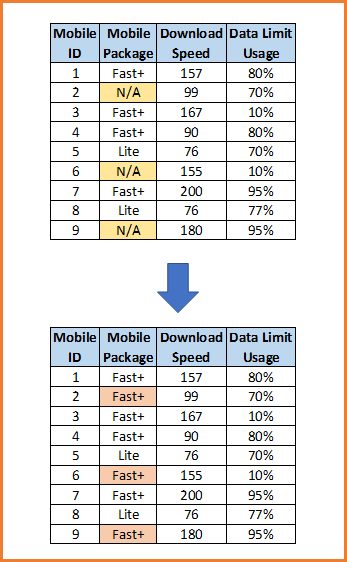

### Imputar con valores arbitrarios
Estos valores de reemplazo suelen ser diferentes a la media/mediana/moda de la variable. Típicamente se usan los valores 0,-1, 99, 999 ó 9999
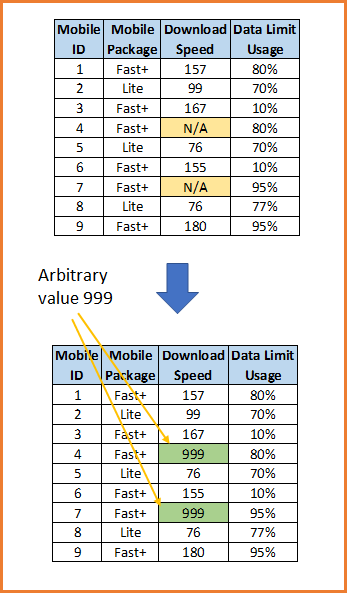

### Añadir variable binaria indicando NaNs
Podemos capturar la importancia de los missings creando una variable binaria adicional indicando si hay valores missings (1) o no (0). Normalmente, suele acompañarse de una imputación por la media o la mediana de la variable con missings
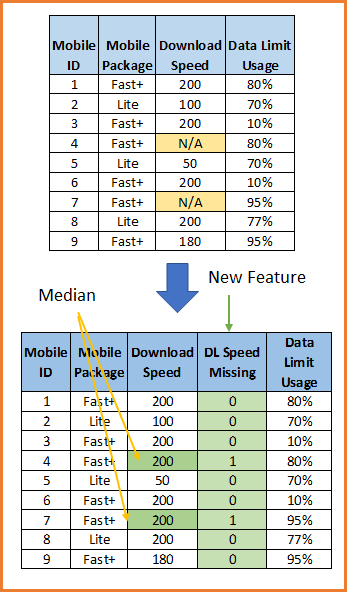

### Imputación con muestreo aleatorio
Intentando preservar la distribución original de la variable, imputa los valores que falten con un valor aleatorio de las observaciones de la variable

### Otras técnicas
Además de las indicadas, existen otras técnicas más complejas para la imputación de missings, basadas en modelos de Machine Learning, las cuales consisten en predecir un missing en función de otras variables 
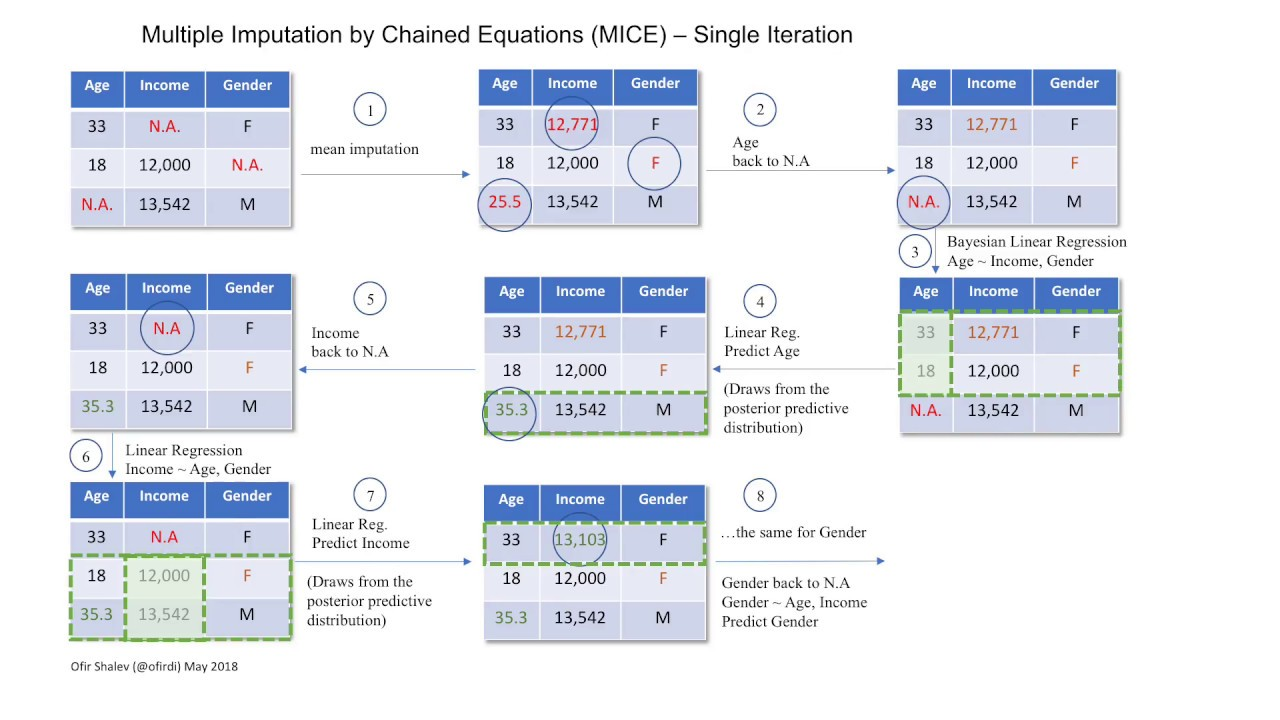

# Ejemplo 1

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
data.shape

(13580, 21)

In [2]:
# Consultar valores nulos:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [3]:
data['BuildingArea'].isnull().any()

True

In [6]:
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]

cols_with_missing

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

In [8]:
# Quitar columnas con missings
reduced_data = data.drop(cols_with_missing, axis=1)
reduced_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [13]:
is_numeric_dtype(data['Car'])

True

In [14]:
is_string_dtype(data['CouncilArea'])

True

In [15]:
# La moda devuelve una serie, asi que hay que pedir el indice
data['CouncilArea'].mode().values[0]

'Moreland'

In [18]:
# Imputar por la mediana (columnas numéricas) o valor más frecuente (columnas categóricas)
from pandas.api.types import is_string_dtype, is_numeric_dtype

data2 = data.copy()

for col in cols_with_missing:
    if is_numeric_dtype(data2[col]):
        data2[col].fillna(data2[col].median(), inplace=True)
    elif is_string_dtype(data2[col]):
        data2[col].fillna(data2[col].mode().values[0], inplace=True)
    

In [21]:
data2.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [26]:
# Columnas extra

data3 = data.copy()

'''
for col in cols_with_missing:
    data3[col+'_was_missing'] = data3[col].apply(lambda x: 0 if pd.notna(x) else 1)
'''
for col in cols_with_missing:
    data3[col+'_was_missing'] = data3[col].isnull().astype('int')


In [40]:
data3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing,CouncilArea_was_missing
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,0,1,1,0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,0,0,0,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,0,0,0,0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,0,1,1,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,0,1,0,1
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,0,0,0,1
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,0,1,0,1
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,0,0,0,1


# Ejemplo 2 (Series temporales)

In [5]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from scipy import interpolate
import matplotlib.pyplot as plt

df_orig = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('data/a10_missings.csv', parse_dates=['date'], index_col='date')

In [6]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,NaN
1991-10-01,3.611003
1991-11-01,NaN
...,...
1999-06-01,8.165323
1999-07-01,NaN
1999-08-01,9.070964


In [7]:
df_orig

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
1999-06-01,8.165323
1999-07-01,8.717420
1999-08-01,9.070964


In [8]:
# Forward fill
df_ffill = df.ffill()
error = mean_squared_error(df_orig['value'],df_ffill['value'])
error

0.3652999744512052

In [9]:
# Backward fill
df_bfill = df.bfill()
df_bfill
error = mean_squared_error(df_orig['value'],df_bfill['value'])
error

0.5086413712345681

In [12]:
# Linear interpolation

df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset=['value'])
f = interp1d(df_nona['rownum'],df_nona['value'])
df['linear_fill'] = f(df['rownum'])
df

,value,rownum,linear_fill
date,,,
1991-07-01,3.526591,0,3.526591
1991-08-01,3.180891,1,3.180891
1991-09-01,NaN,2,3.395947
1991-10-01,3.611003,3,3.611003
1991-11-01,NaN,4,3.958687
...,...,...,...
1999-06-01,8.165323,95,8.165323
1999-07-01,NaN,96,8.618143
1999-08-01,9.070964,97,9.070964


In [13]:
# Calculamos el error cuadratica medio de Linear interpolation
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset=['value'])
f = interp1d(df_nona['rownum'],df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = mean_squared_error(df_orig['value'],df['linear_fill'])
error

0.3691337898396245

<AxesSubplot: title={'center': 'Linear Fill (MSE: 0.37)'}, xlabel='date'>

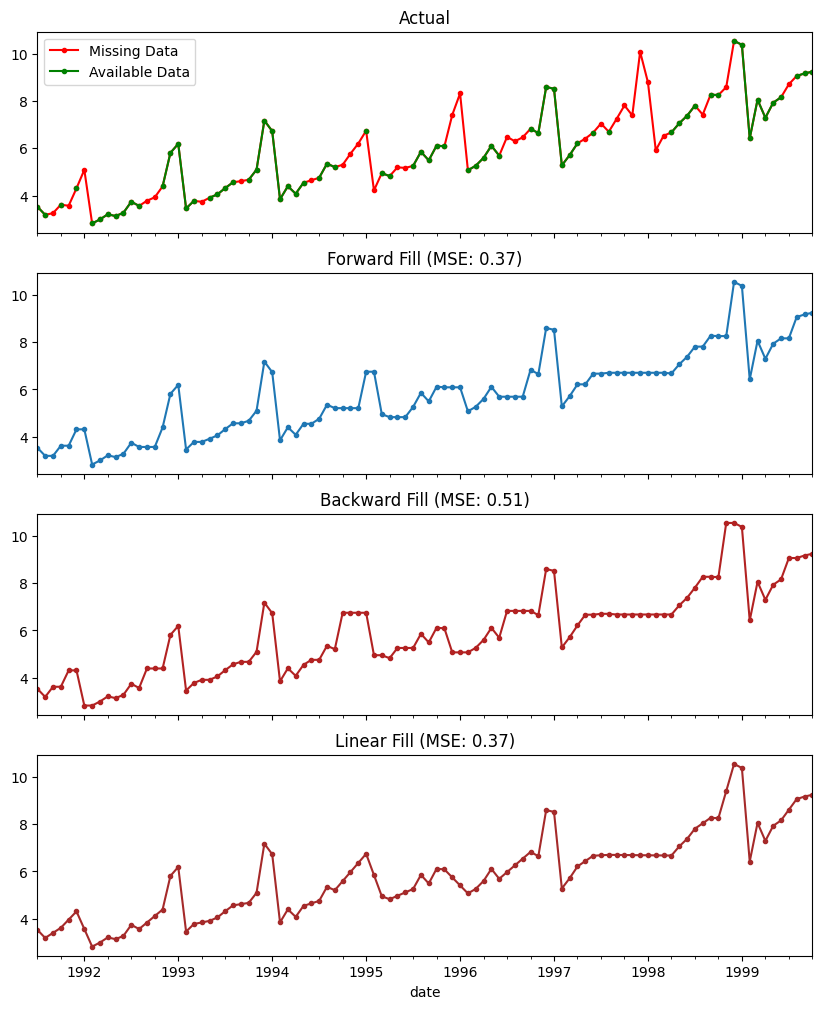

In [11]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})
## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])
## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")
## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")
## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset=['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")